In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
import os

In [4]:
data = pd.read_csv(os.path.expanduser("~/Desktop/DS_Competition/ucsbdata.csv"))
data = data.drop(['Index', 'OPEN', 'HIGH', 'LOW', 'ASP', 'TERM', 'VRP', 
         'LOAN','DXY', 'HTIME', 'LTIME', 'IC', 
         'INF', 'UR', 'URR', 'HS', 'FOMC', 'PPIR', 
         'NAPMPMI', 'NAPMNEWO', 'NAPMPRIC', 'PTB', 'CATY','PCR', 'NOS', 'MVOLE', 'NYSEADV', 'RV',
         'RELINF', 'SIM', 'TOM', 'BDIY', 'SENTIMENT1',
         'SENTIMENT2', 'SENTIMENT3', 'SENTIMENT4', 'HULBERTSENTIMENT',
         'MYSTERYVAR1', 'MYSTERYVAR2','DEBT', 'RETURN', 'STOCKS', 'WAR'], axis=1)


data.fillna(method='ffill')
data.fillna(0, inplace=True)
data.head(10)

,R,US10YR,EPS,PER,CLOSE,VIX,ADVDECL,FEDFUNDS,BAA,BER,...,DEL,BBY,TYVIX,CRP,INDPRO,CAPE,MYSTERYVAR3,BUBBLE,CASH,DIVIDEND
0,0.0,0.0,2.44,9.754098,23.80,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.754098,0.0,0.0,0.0,0.0
1,0.0,0.0,2.44,9.786885,23.88,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.786885,0.0,0.0,0.0,0.0
2,0.0,0.0,2.44,9.803279,23.92,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.803279,0.0,0.0,0.0,0.0
3,0.0,0.0,2.44,9.799180,23.91,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.799180,0.0,0.0,0.0,0.0
4,0.0,0.0,2.44,9.762295,23.82,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.762295,0.0,0.0,0.0,0.0
5,0.0,0.0,2.44,9.729508,23.74,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.729508,0.0,0.0,0.0,0.0
6,0.0,0.0,2.44,9.778689,23.86,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.778689,0.0,0.0,0.0,0.0
7,0.0,0.0,2.43,9.868313,23.98,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.827901,0.0,0.0,0.0,0.0
8,0.0,0.0,2.43,9.942387,24.16,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.901704,0.0,0.0,0.0,0.0
9,0.0,0.0,2.43,9.901235,24.06,0.0,0.0,0.0,3.59,0.0,...,0.0,0.0,0.0,0.61,185.435685,9.860753,0.0,0.0,0.0,0.0


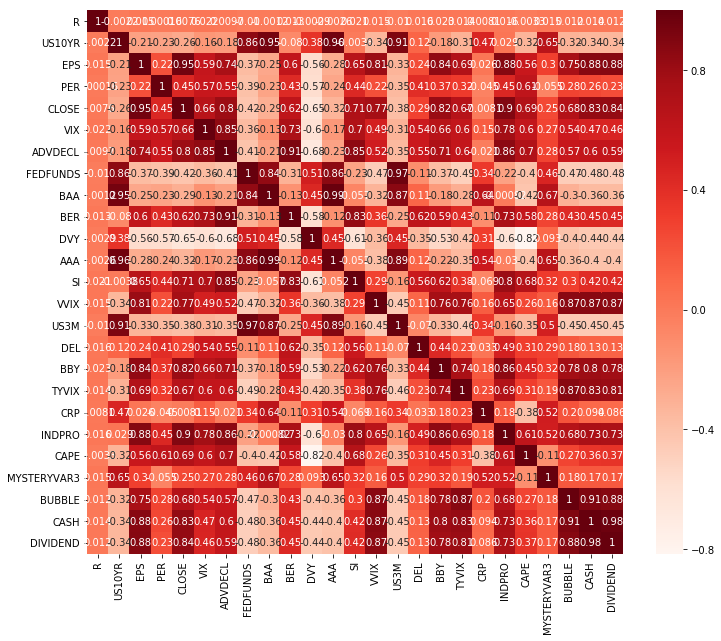

In [5]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
#Correlation with output variable
cor_target = abs(cor["CLOSE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print("Filter Method:")
relevant_features

Filter Method:


EPS         0.952893
CLOSE       1.000000
VIX         0.659115
ADVDECL     0.796885
BER         0.623528
DVY         0.647123
SI          0.711266
VVIX        0.765625
BBY         0.815438
TYVIX       0.669180
INDPRO      0.897591
CAPE        0.688507
BUBBLE      0.683577
CASH        0.833101
DIVIDEND    0.836511
Name: CLOSE, dtype: float64

In [30]:
X = data.drop("CLOSE", 1)
y = data["CLOSE"]

In [25]:
#no of features
nof_list=np.arange(1,25)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 24
Score with 24 features: 0.985925


In [28]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 24)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print("RFE Selected Features: ", selected_features_rfe.values)

RFE Selected Features:  ['R' 'US10YR' 'EPS' 'PER' 'VIX' 'ADVDECL' 'FEDFUNDS' 'BAA' 'BER' 'DVY'
 'AAA' 'SI' 'VVIX' 'US3M' 'DEL' 'BBY' 'TYVIX' 'CRP' 'INDPRO' 'CAPE'
 'MYSTERYVAR3' 'BUBBLE' 'CASH' 'DIVIDEND']


### Filter results in 15 relevant features
    - Less accurate, effective for exploratory data analysis and checking for collinearity 
### RFE (Recursive Feature Elimination) suggests that all features are relevant? 
    - Possibly because my data is not standardized / scaled properly yet
### Embedded Method: Lasso (Below) selects 8 features
    - Although accurate, RFE and Lasso methods are more computational expensive so it is ideal to use these when dealing with ~20 features

In [21]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 163.765712
Best score using built-in LassoCV: 0.978257
Lasso picked 8 variables and eliminated the other 16 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

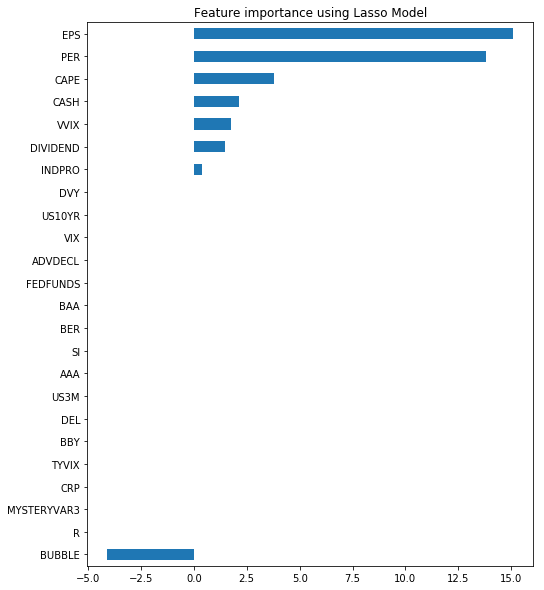

In [22]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [11]:
# Filling in missing values
# Standardizing / Rescaling data
# RFE 
# Correlation Matrix/VIF 
# Account for multi colinearity
# Remove correlative features
# Use Nihaal's benchmark plots to check if model improves.

# 1) Neural Network: Read up. How to make one for our purposes?
# 2) Gam Model: What is best model for our purposes? Probably nonlinear